Name: Miryam Strautkalns

Student ID: 012561315

Project Exploratory Data Analysis:

Predict students' dropout and academic success

**Introduction:**

I chose a data set that records data about students in college that hopes to explain factors that may contribute to people dropping out of school. I think that higher education not only uplifts an individual, but it uplifts society. I've been told on many occasions that family support is the biggest factor on success in higher education. I'm curious to see if that is something that will be represented in the data. We live in a world where not everyone is equipped with the same family structure or economic support. I think this and future data regarding individuals that drop out of university would benefit how we create supportive services to help people stay successful when they are in college.


**Questions:**

Does income/aid have a strong impact(correlation) on dropout rate?


Will family based variables, support, have a strong impact?

Do families where parents have a college degree have a lower dropout rate?

Maturity, will older students have a lower dropout rate?

Will students who receive scholarships have a lower dropout rate? Perhaps scholarships help create more financial stability.

**Data:**

Each row represents a student, there are 4424 rows of data. This was an observational study, data was collected at enrollment and without any intervention, in the outcome, students were asked for updates at the conclusion of that semester of study.

**Units of Observations:**


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
import missingno as msno
import scipy.stats as stats

datapd = pd.read_csv('/content/dataset.csv')
datapd_grad = datapd.where(datapd['Target'] == 'Graduate')
datapd_drop = datapd.where(datapd['Target'] == 'Dropout')
datapd_grad.head()
datapd_raw = datapd

print('Number of Data Entries:')
print(len(datapd.index), '\n')

print("Variables (C: Categorical, D: Discrete) \n")
var_values = {'Marital status': 'C', 'Application mode': 'C', 'Application order': 'D',
              'Course': 'C', 'Daytime/evening attendance': 'C', 'Previous qualification': 'C',
              'Nationality': 'C', 'Mother\'s qualification': 'C', 'Father\'s qualification': 'C',
              'Mother\'s occupation': 'C', 'Father\'s occupation': 'C', 'Displaced': 'C',
              'Educational special needs': 'C', 'Debtor': 'C', 'Tuition fees up to date': 'C',
              'Gender': 'C', 'Scholarship holder': 'C', 'Age at enrollment': 'D', 'International': 'C',
              'Curricular units 1st sem (credited)': 'D', 'Curricular units 1st sem (enrolled)': 'D',
              'Curricular units 1st sem (evaluations)': 'D', 'Curricular units 1st sem (approved)': 'D',
              'Curricular units 1st sem (grade)': 'D', 'Curricular units 1st sem (without evaluations)': 'D',
              'Curricular units 2nd sem (credited)': 'D', 'Curricular units 2nd sem (enrolled)': 'D',
              'Curricular units 2nd sem (evaluations)': 'D', 'Curricular units 2nd sem (approved)': 'D',
              'Curricular units 2nd sem (grade)': 'D', 'Curricular units 2nd sem (without evaluations)': 'D',
              'Unemployment rate': 'D', 'Inflation rate': 'D', 'GDP': 'D', 'Target': 'C'}
discrete = 0
categ = 0
for title in var_values:
  if var_values[title] == 'C':
    categ = categ + 1
  else:
    discrete = discrete + 1
  print(title, ':', var_values[title])

print('\nThere are', categ, 'categorical variables and', discrete, 'discrete variables.')


Number of Data Entries:
4424 

Variables (C: Categorical, D: Discrete) 

Marital status : C
Application mode : C
Application order : D
Course : C
Daytime/evening attendance : C
Previous qualification : C
Nationality : C
Mother's qualification : C
Father's qualification : C
Mother's occupation : C
Father's occupation : C
Displaced : C
Educational special needs : C
Debtor : C
Tuition fees up to date : C
Gender : C
Scholarship holder : C
Age at enrollment : D
International : C
Curricular units 1st sem (credited) : D
Curricular units 1st sem (enrolled) : D
Curricular units 1st sem (evaluations) : D
Curricular units 1st sem (approved) : D
Curricular units 1st sem (grade) : D
Curricular units 1st sem (without evaluations) : D
Curricular units 2nd sem (credited) : D
Curricular units 2nd sem (enrolled) : D
Curricular units 2nd sem (evaluations) : D
Curricular units 2nd sem (approved) : D
Curricular units 2nd sem (grade) : D
Curricular units 2nd sem (without evaluations) : D
Unemployment rate :

In [ ]:
print("\nNumber of Duplicates in Data Set:")
print(len(datapd_grad[datapd_grad.duplicated()].index))

dropout_dtypes = datapd_grad.dtypes
print("\nData Types:")
print(dropout_dtypes)


Number of Duplicates in Data Set:
2214

Data Types:
Marital status                                    float64
Application mode                                  float64
Application order                                 float64
Course                                            float64
Daytime/evening attendance                        float64
Previous qualification                            float64
Nationality                                       float64
Mother's qualification                            float64
Father's qualification                            float64
Mother's occupation                               float64
Father's occupation                               float64
Displaced                                         float64
Educational special needs                         float64
Debtor                                            float64
Tuition fees up to date                           float64
Gender                                            float64
Scholarship holder 

In [ ]:
datapd.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Description of Statistics**

In [ ]:
datapd.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


**Data Visualizations:**

**Box Plots:**

For 'Age at enrollment', 'Unemployment rate', 'Inflation rate', and 'GDP'.


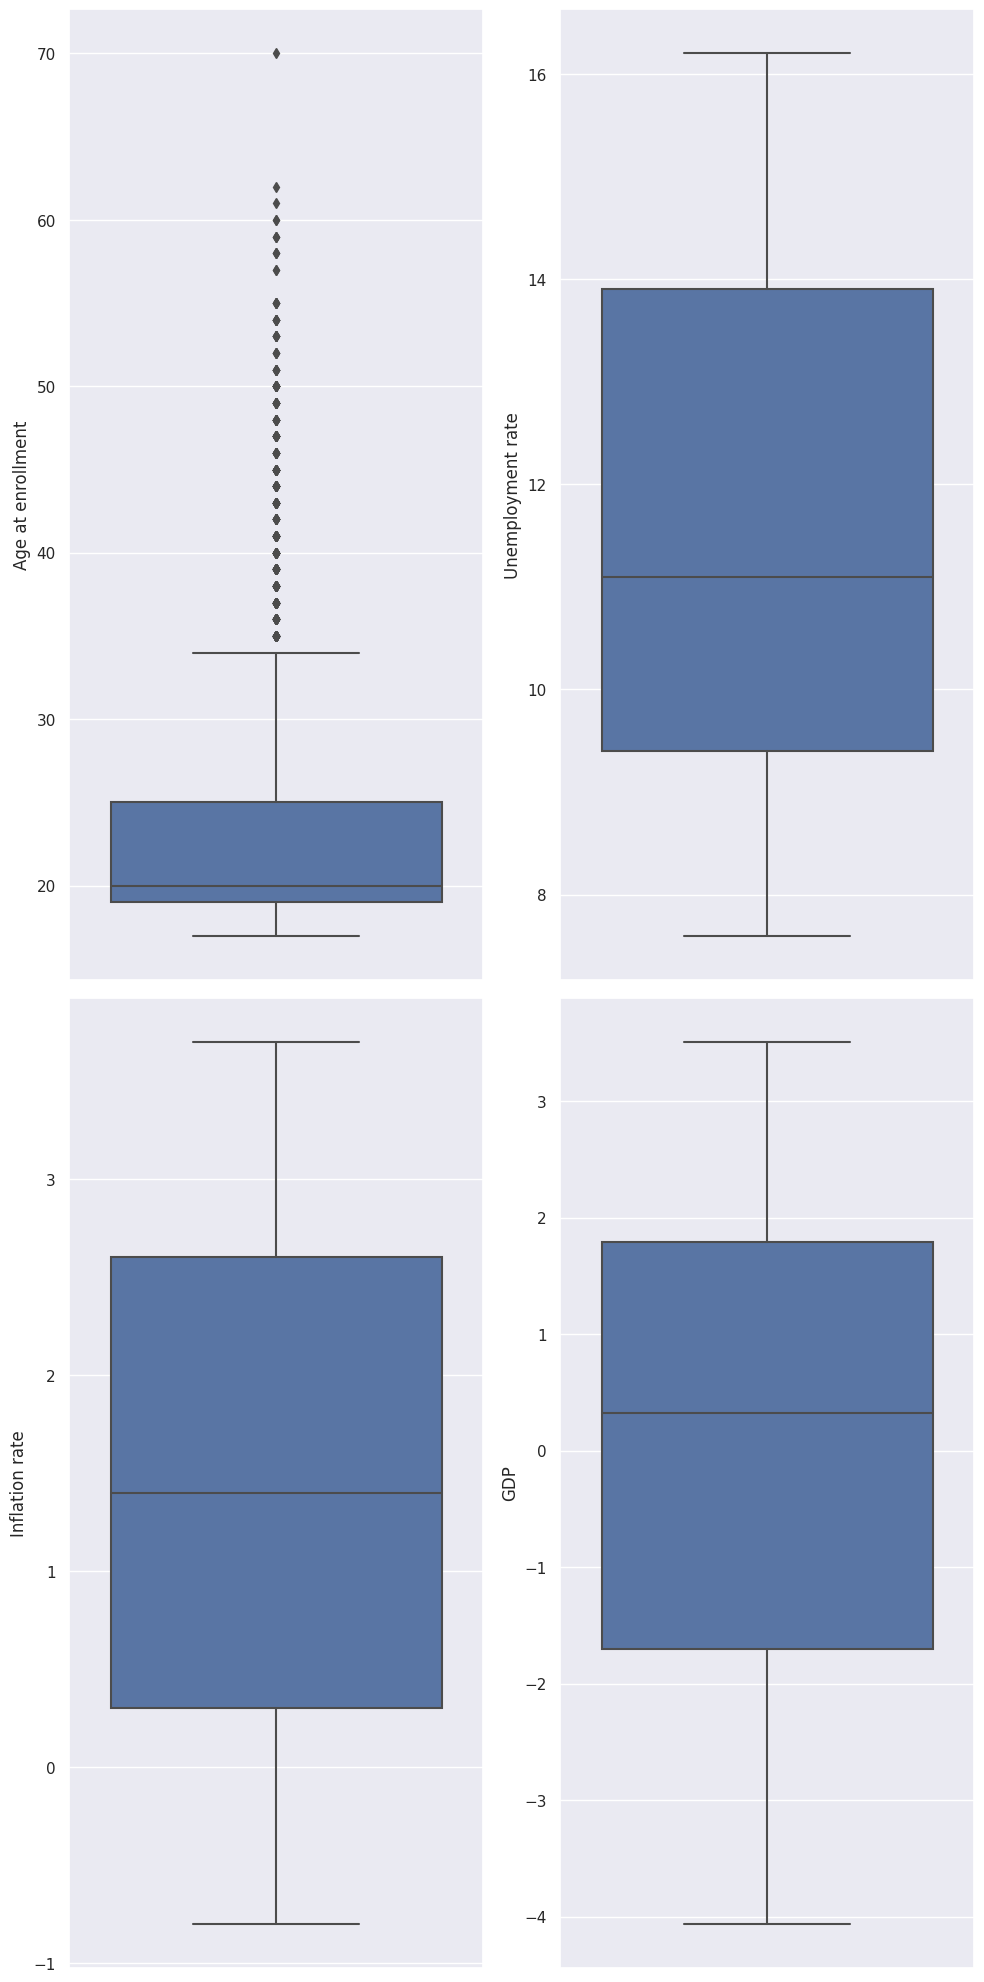

In [ ]:
col_student = ['Previous qualification', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']
col_student_bp = ['Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(10,20))
row = 0
col = 0
for i in datapd[col_student_bp].columns:
    if col > 1:
        row += 1
        col = 0

    axes = ax[row,col]
    sns.boxplot(y = datapd[i],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

**Boxplot Analysis:**

**Distributions**

Age at enrollment and Unemployment rate are positively skewed, GDP is slightly negatively skewed, and Inflation rate appears to be normally distributed. Age at enrollment has many outliers.

Some of the data values lack description, I decided to replace some of it for clarity.

**Course**

The highest retention in graduating is Nursing, and the lowest retention is in Informatics Engineering.

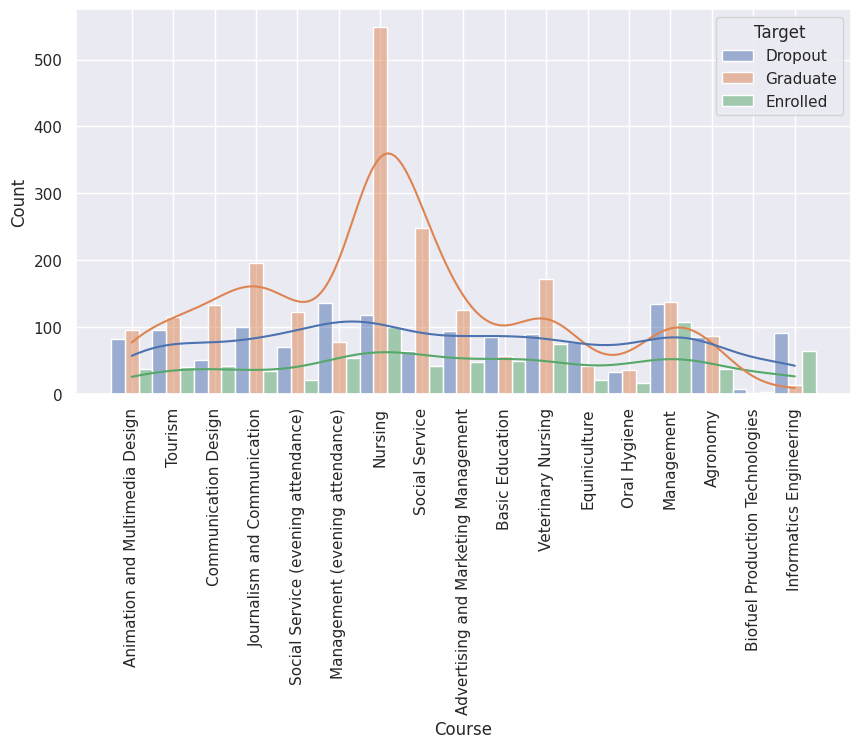

In [ ]:
course_key = {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)', 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing', 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management', 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene', 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication', 16: 'Basic Education', 17: 'Management (evening attendance)'}

fig, ax = plt.subplots(figsize=(10, 5))
datapd_update = datapd_raw.replace({'Course': course_key})


sns.histplot(data=datapd_update, x="Course", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)

**Previous qualification**

Those who graduate have more individuals with previous qualifications in secondary education.

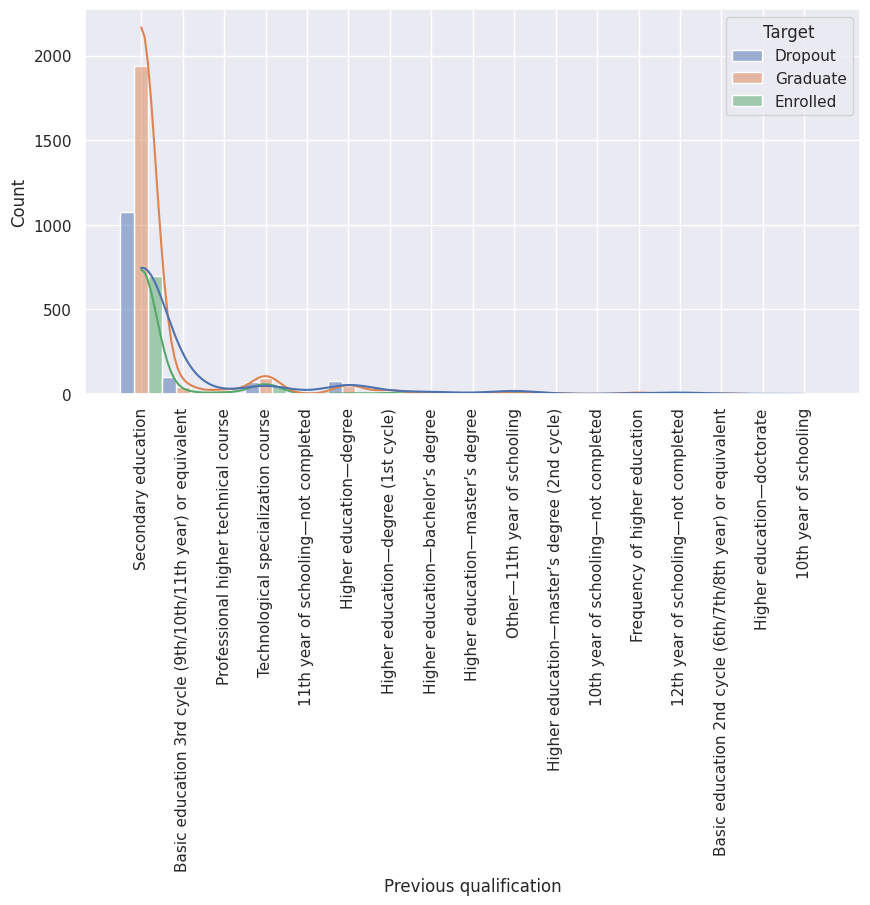

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
prev_qual_key = {1: 'Secondary education', 2: 'Higher education—bachelor’s degree', 3: 'Higher education—degree', 4: 'Higher education—master’s degree', 5: 'Higher education—doctorate', 6: 'Frequency of higher education', 7: '12th year of schooling—not completed', 8: '11th year of schooling—not completed', 9: 'Other—11th year of schooling', 10: '10th year of schooling', 11: '10th year of schooling—not completed', 12: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent', 13: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent', 14: 'Technological specialization course', 15: 'Higher education—degree (1st cycle)', 16: 'Professional higher technical course', 17: 'Higher education—master’s degree (2nd cycle)'}
datapd_update = datapd_raw.replace({'Previous qualification': prev_qual_key})
datapd_update['Previous qualification']
sns.histplot(data=datapd_update, x="Previous qualification", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)


**Mother's qualification**

Graduates show higher numbers for a mother's qualification who has higher education or a skilled work position.

In [ ]:

mom_dad_qual_key = {1: 'Secondary Education—12th Year of Schooling or Equivalent', 2: 'Higher Education—bachelor’s degree', 3: 'Higher Education—degree', 4: 'Higher Education—master’s degree', 5: 'Higher Education—doctorate', 6: 'Frequency of Higher Education', 7: '12th Year of Schooling—not completed', 8: '11th Year of Schooling—not completed', 9: '7th Year (Old)', 10: 'Other—11th Year of Schooling', 11: '2nd year complementary high school course', 12: '10th Year of Schooling', 13: 'General commerce course', 14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent', 15: 'Complementary High School Course', 16: 'Technical-professional course', 17: 'Complementary High School Course—not concluded', 18: '7th year of schooling', 19: '2nd cycle of the general high school course', 20: '9th Year of Schooling—not completed', 21: '8th year of schooling', 22: 'General Course of Administration and Commerce', 23: 'Supplementary Accounting and Administration', 24: 'Unknown', 25: 'Cannot read or write', 26: 'Can read without having a 4th year of schooling', 27: 'Basic education 1st cycle (4th/5th year) or equivalent', 28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent', 29: 'Technological specialization course', 30: 'Higher education—degree (1st cycle)', 31: 'Specialized higher studies course', 32: 'Professional higher technical course', 33: 'Higher Education—master’s degree (2nd cycle)', 34: 'Higher Education—doctorate (3rd cycle)'}

datapd_grad = datapd_grad.replace({'Mother\'s qualification': mom_dad_qual_key})

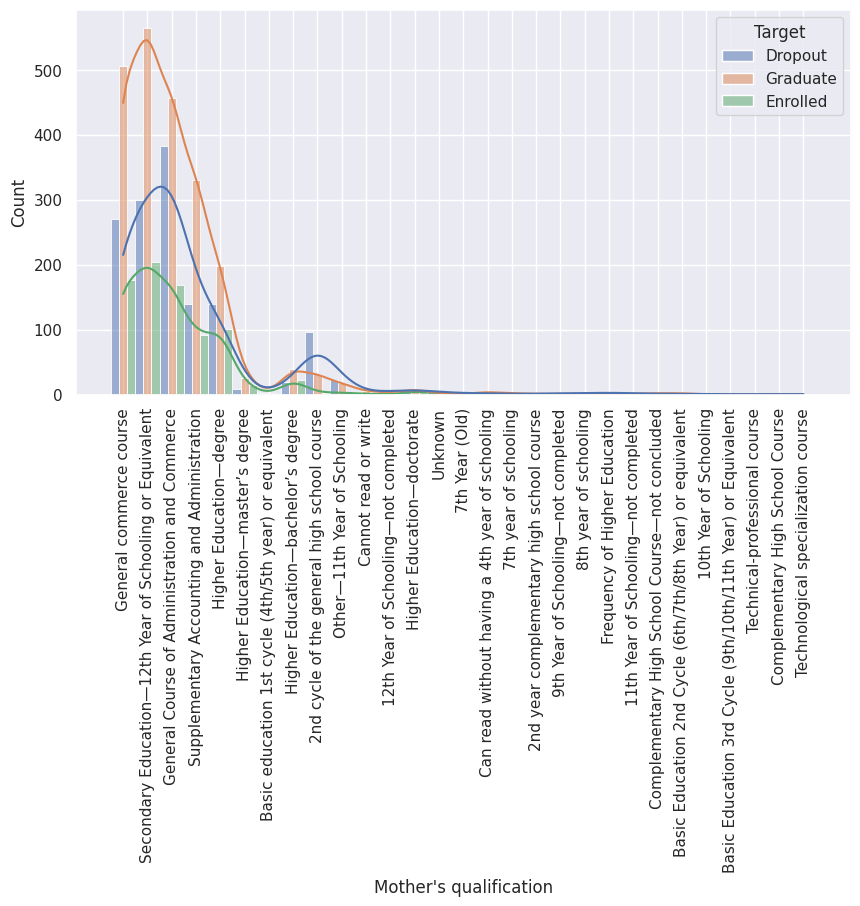

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
datapd_updated = datapd_raw.replace({'Mother\'s qualification': mom_dad_qual_key})

sns.histplot(data=datapd_updated, x="Mother\'s qualification", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)

**Father's qualification**

Graduates show higher numbers for a father's qualification who has higher education or a skilled work position.

In [ ]:

mom_dad_qual_key = {1: 'Secondary Education—12th Year of Schooling or Equivalent', 2: 'Higher Education—bachelor’s degree', 3: 'Higher Education—degree', 4: 'Higher Education—master’s degree', 5: 'Higher Education—doctorate', 6: 'Frequency of Higher Education', 7: '12th Year of Schooling—not completed', 8: '11th Year of Schooling—not completed', 9: '7th Year (Old)', 10: 'Other—11th Year of Schooling', 11: '2nd year complementary high school course', 12: '10th Year of Schooling', 13: 'General commerce course', 14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent', 15: 'Complementary High School Course', 16: 'Technical-professional course', 17: 'Complementary High School Course—not concluded', 18: '7th year of schooling', 19: '2nd cycle of the general high school course', 20: '9th Year of Schooling—not completed', 21: '8th year of schooling', 22: 'General Course of Administration and Commerce', 23: 'Supplementary Accounting and Administration', 24: 'Unknown', 25: 'Cannot read or write', 26: 'Can read without having a 4th year of schooling', 27: 'Basic education 1st cycle (4th/5th year) or equivalent', 28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent', 29: 'Technological specialization course', 30: 'Higher education—degree (1st cycle)', 31: 'Specialized higher studies course', 32: 'Professional higher technical course', 33: 'Higher Education—master’s degree (2nd cycle)', 34: 'Higher Education—doctorate (3rd cycle)'}

datapd_grad = datapd_grad.replace({'Father\'s qualification': mom_dad_qual_key})


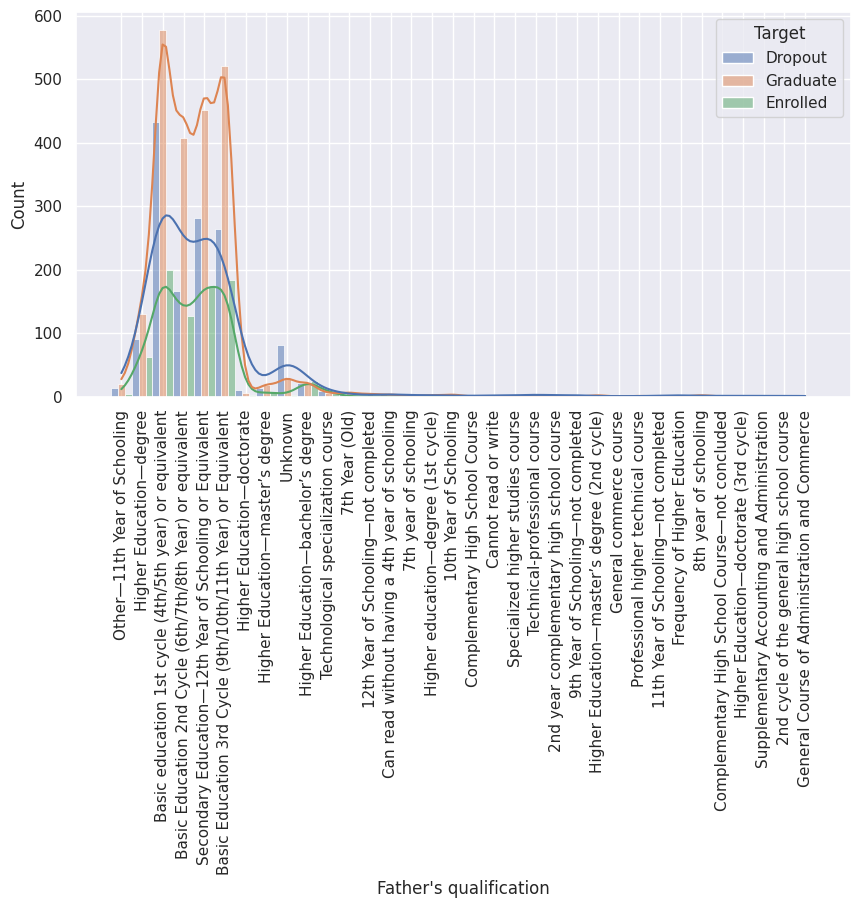

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
datapd_updated = datapd_updated.replace({'Father\'s qualification': mom_dad_qual_key})
sns.histplot(data=datapd_updated, x="Father\'s qualification", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)


**Mother's occupation**

Interestingly, despite having higher numbers in mother's qualifications for higher education and skill, Graduates have significantly high numbers of individuals with mothers who work in unskilled positions.

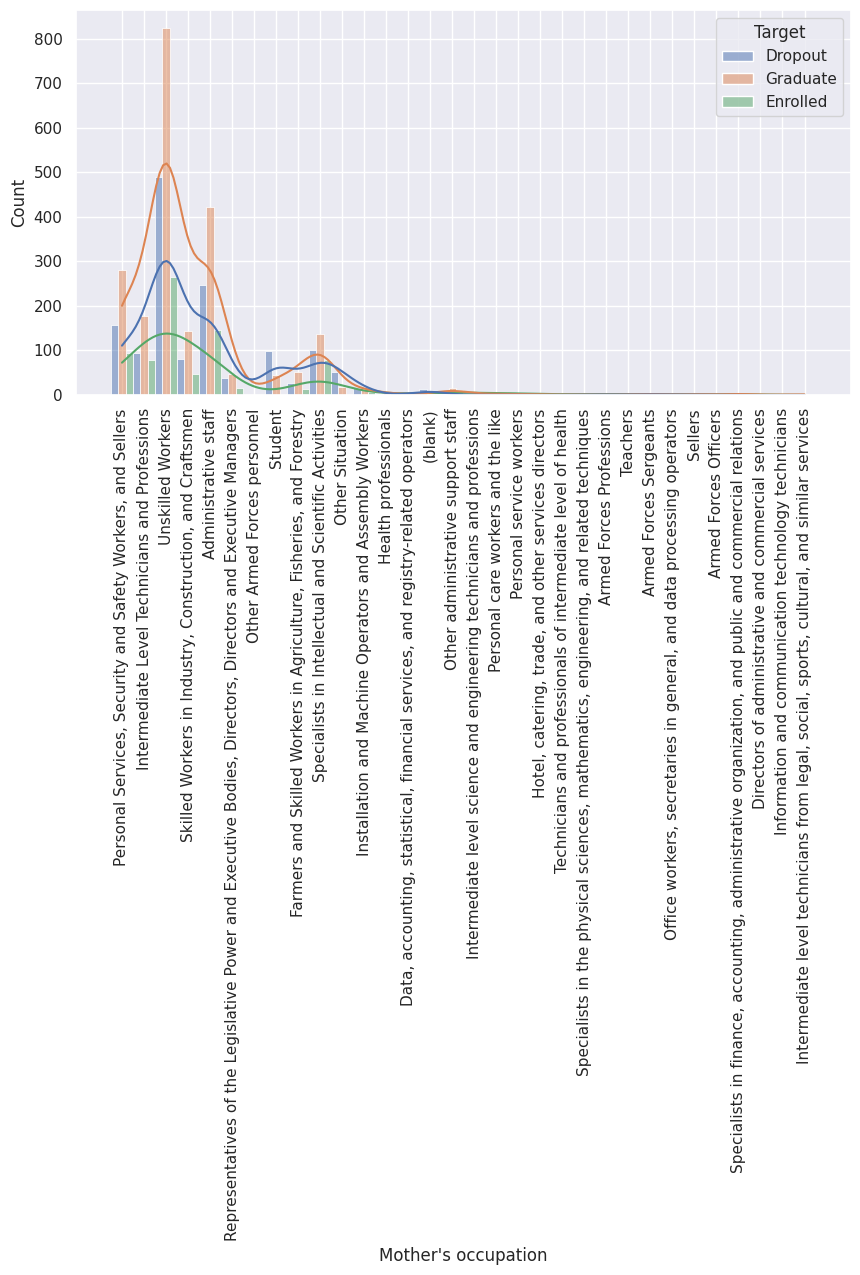

In [ ]:
mom_dad_occup_key = {1: 'Student', 2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 3: 'Specialists in Intellectual and Scientific Activities', 4: 'Intermediate Level Technicians and Professions', 5: 'Administrative staff', 6: 'Personal Services, Security and Safety Workers, and Sellers', 7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry', 8: 'Skilled Workers in Industry, Construction, and Craftsmen', 9: 'Installation and Machine Operators and Assembly Workers', 10: 'Unskilled Workers', 11: 'Armed Forces Professions', 12: 'Other Situation', 13: '(blank)', 14: 'Armed Forces Officers', 15: 'Armed Forces Sergeants', 16:'Other Armed Forces personnel', 17:'Directors of administrative and commercial services', 18:'Hotel, catering, trade, and other services directors', 19:'Specialists in the physical sciences, mathematics, engineering, and related techniques', 20:'Health professionals', 21:'Teachers', 22:'Specialists in finance, accounting, administrative organization, and public and commercial relations', 23:'Intermediate level science and engineering technicians and professions', 24:'Technicians and professionals of intermediate level of health', 25:'Intermediate level technicians from legal, social, sports, cultural, and similar services', 26:'Information and communication technology technicians', 27:'Office workers, secretaries in general, and data processing operators', 28:'Data, accounting, statistical, financial services, and registry-related operators', 29:'Other administrative support staff', 30:'Personal service workers', 31: 'Sellers', 32:'Personal care workers and the like', 33:'Protection and security services personnel', 34:'Market-oriented farmers and skilled agricultural and animal production workers', 35:'Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence', 36: 'Skilled construction workers and the like, except electricians', 37: 'Skilled workers in metallurgy, metalworking, and similar', 38: 'Skilled workers in electricity and electronics', 39: 'Workers in food processing, woodworking, and clothing and other industries and crafts', 40: 'Fixed plant and machine operators', 41: 'Assembly workers', 42: 'Vehicle drivers and mobile equipment operators', 43: 'Unskilled workers in agriculture, animal production, and fisheries and forestry', 44: 'Unskilled workers in extractive industry, construction, manufacturing, and transport', 45: 'Meal preparation assistants', 46: 'Street vendors (except food) and street service providers'}

fig, ax = plt.subplots(figsize=(10, 5))
datapd_updated = datapd_updated.replace({'Mother\'s occupation': mom_dad_occup_key})

sns.histplot(data=datapd_updated, x="Mother\'s occupation", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)



**Father's occupation**

There is more consistency in the difference between those who graduate and drop out. There are more mothers working in unskilled work than in the data for fathers, but the difference exists within multiple lower skilled occupations in the data for father's occupation, graduates having the highest number of fathers working in these occupations.

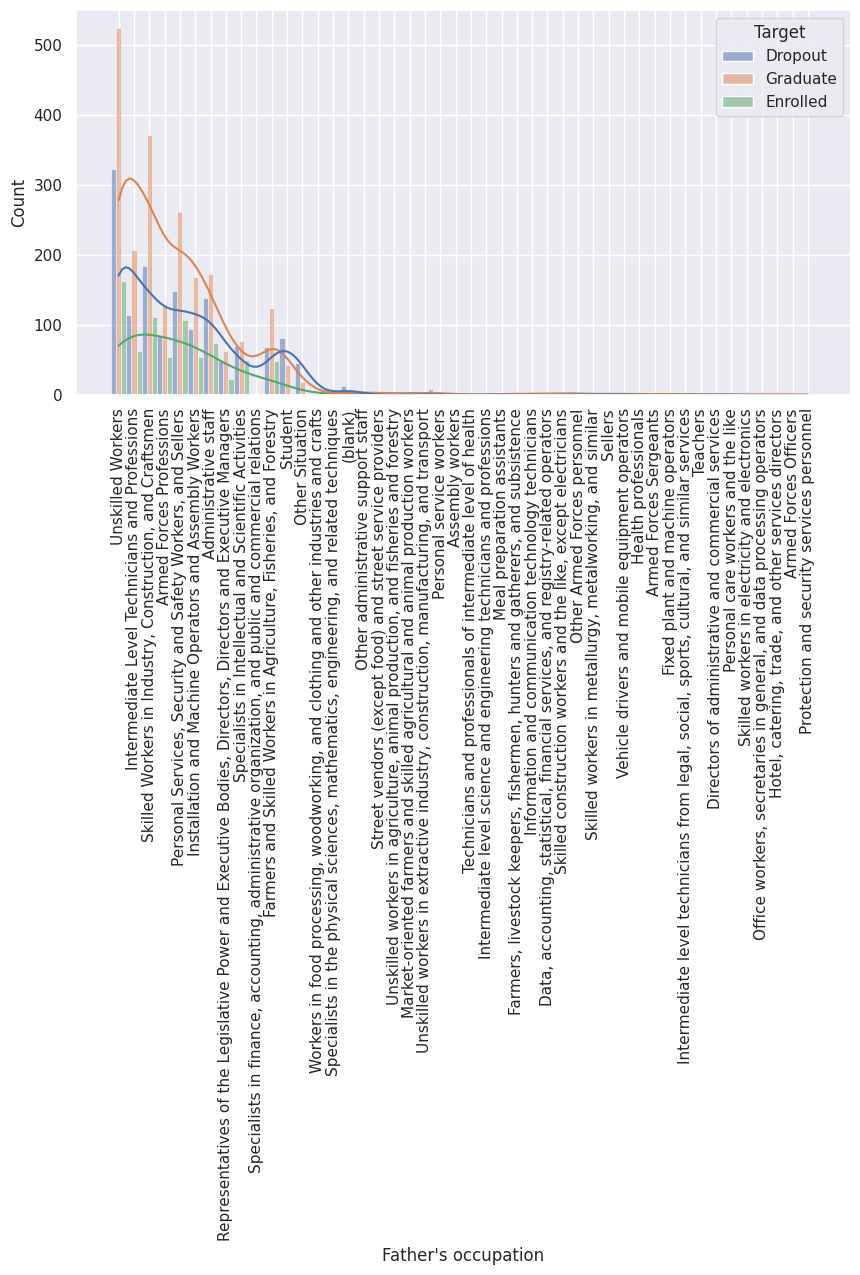

In [ ]:

mom_dad_occup_key = {1: 'Student', 2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 3: 'Specialists in Intellectual and Scientific Activities', 4: 'Intermediate Level Technicians and Professions', 5: 'Administrative staff', 6: 'Personal Services, Security and Safety Workers, and Sellers', 7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry', 8: 'Skilled Workers in Industry, Construction, and Craftsmen', 9: 'Installation and Machine Operators and Assembly Workers', 10: 'Unskilled Workers', 11: 'Armed Forces Professions', 12: 'Other Situation', 13: '(blank)', 14: 'Armed Forces Officers', 15: 'Armed Forces Sergeants', 16:'Other Armed Forces personnel', 17:'Directors of administrative and commercial services', 18:'Hotel, catering, trade, and other services directors', 19:'Specialists in the physical sciences, mathematics, engineering, and related techniques', 20:'Health professionals', 21:'Teachers', 22:'Specialists in finance, accounting, administrative organization, and public and commercial relations', 23:'Intermediate level science and engineering technicians and professions', 24:'Technicians and professionals of intermediate level of health', 25:'Intermediate level technicians from legal, social, sports, cultural, and similar services', 26:'Information and communication technology technicians', 27:'Office workers, secretaries in general, and data processing operators', 28:'Data, accounting, statistical, financial services, and registry-related operators', 29:'Other administrative support staff', 30:'Personal service workers', 31: 'Sellers', 32:'Personal care workers and the like', 33:'Protection and security services personnel', 34:'Market-oriented farmers and skilled agricultural and animal production workers', 35:'Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence', 36: 'Skilled construction workers and the like, except electricians', 37: 'Skilled workers in metallurgy, metalworking, and similar', 38: 'Skilled workers in electricity and electronics', 39: 'Workers in food processing, woodworking, and clothing and other industries and crafts', 40: 'Fixed plant and machine operators', 41: 'Assembly workers', 42: 'Vehicle drivers and mobile equipment operators', 43: 'Unskilled workers in agriculture, animal production, and fisheries and forestry', 44: 'Unskilled workers in extractive industry, construction, manufacturing, and transport', 45: 'Meal preparation assistants', 46: 'Street vendors (except food) and street service providers'}

fig, ax = plt.subplots(figsize=(10, 5))
datapd_updated = datapd_raw.replace({'Father\'s occupation': mom_dad_occup_key})


sns.histplot(data=datapd_updated, x="Father\'s occupation", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)



**Debtor**

The group with the most individuals in debt are those who have dropped out.

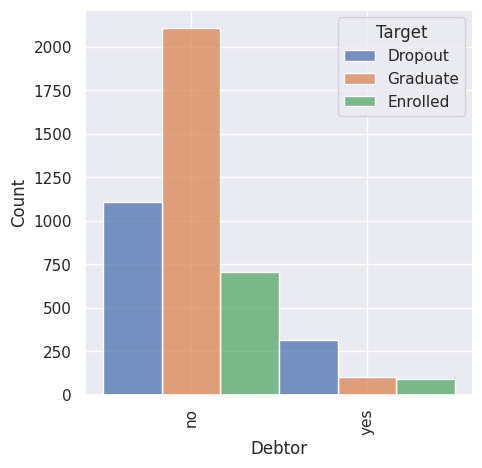

In [ ]:
yes_no_key = {1:'yes', 0:'no'}
datapd_updated = datapd_raw.replace({'Debtor': yes_no_key})


fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(data=datapd_updated, x="Debtor", hue = "Target", multiple="dodge").tick_params(axis='x', rotation=90)

**Tuition fees up to date**

The majority of individuals who are not up to date on tuition payments are individuals who have dropped out.

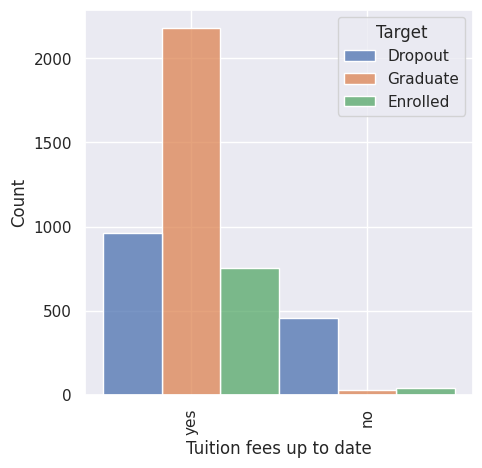

In [ ]:
datapd_updated = datapd_raw.replace({'Tuition fees up to date': yes_no_key})


fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(data=datapd_updated, x="Tuition fees up to date", hue = "Target", multiple="dodge").tick_params(axis='x', rotation=90)

**Gender**

Male students have a higher rate of dropping out when comparing to female students.

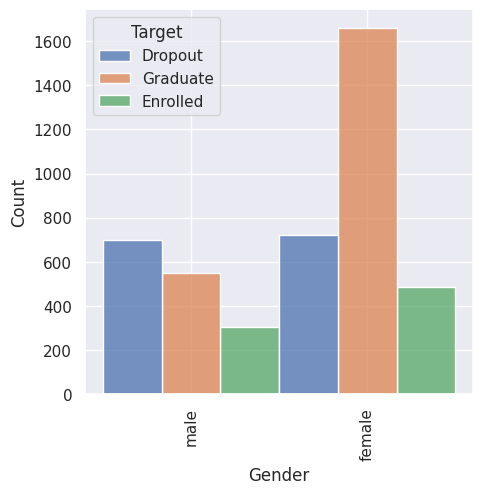

In [ ]:
gender_key = {1: 'male', 0: 'female'}
datapd_updated = datapd_raw.replace({'Gender': gender_key})



fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(data=datapd_updated, x="Gender", hue = "Target", multiple="dodge").tick_params(axis='x', rotation=90)

**Scholarship holder**

A significant majority of individuals who receive scholarships graduate.

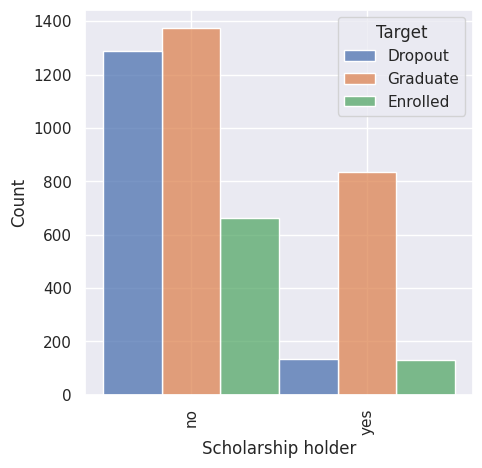

In [ ]:
datapd_updated = datapd_raw.replace({'Scholarship holder': yes_no_key})


fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(data=datapd_updated, x="Scholarship holder", hue = "Target", multiple="dodge").tick_params(axis='x', rotation=90)

**Age at enrollment**

There is a normal distribution of age, with a long tail of outliers.

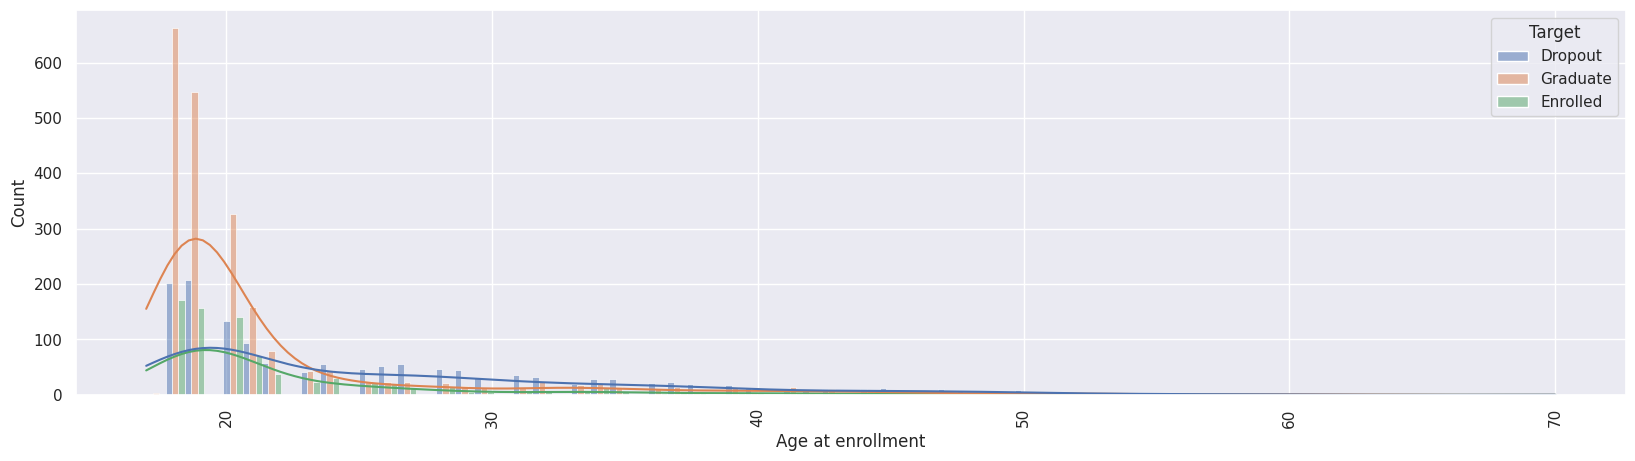

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.histplot(data=datapd_updated, x="Age at enrollment", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)

**Unemployment rate**

The unemployment rate for each target is consistent for each rate value.

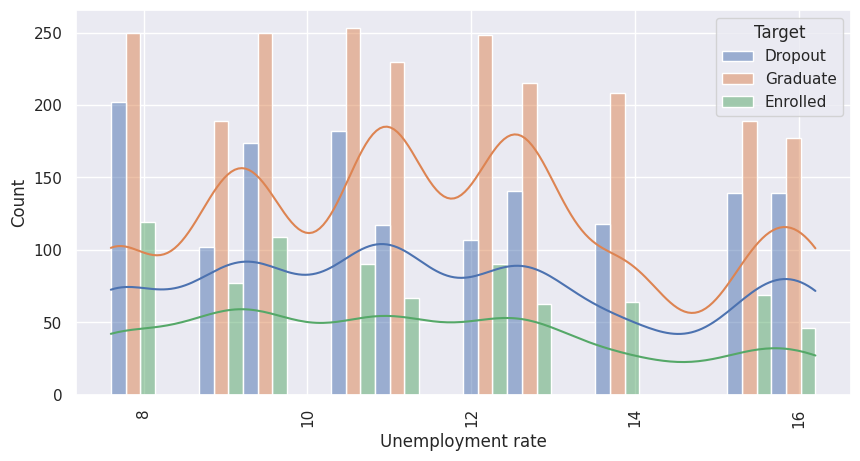

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=datapd_updated, x="Unemployment rate", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)

**Inflation rate**

Greater number of graduates experience lower inflations rates, drop outs have increased count as the inflation rate increases.

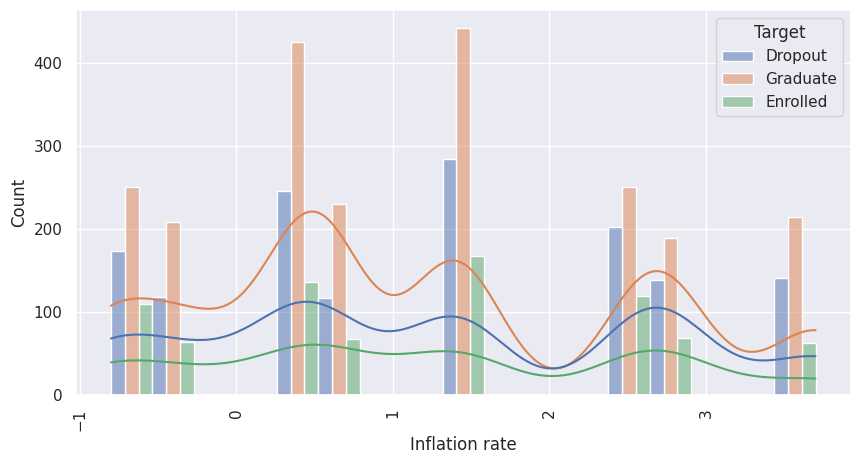

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=datapd_updated, x="Inflation rate", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)

**GDP**

The number of graduates increases as the GDP value increases, drop outs and enrolled individuals have a similar increase in count as GDP values increase.

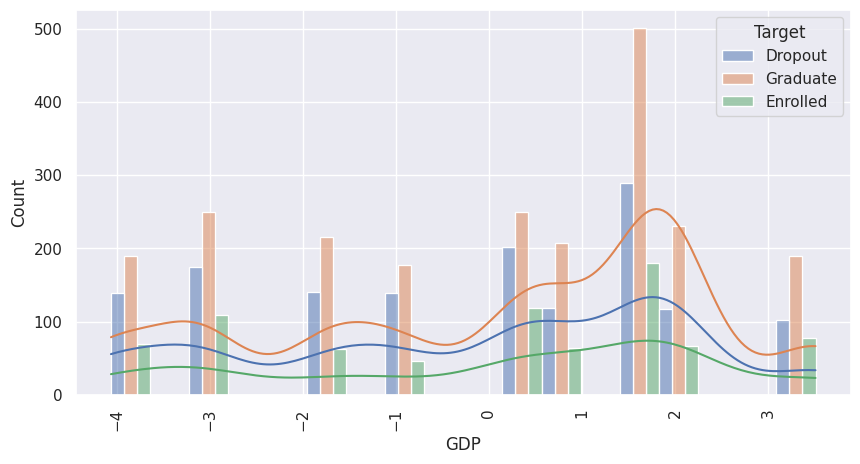

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=datapd_updated, x="GDP", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x', rotation=90)

**QQ Plots**

For **'Age of enrollment', 'Previous qualification', 'Mother's qualification', 'Father's qualification', 'Mother's occupation', and 'Father's occupation'**, I adjusted the data to accommodate its exponential distribution.

Unemployment rate :


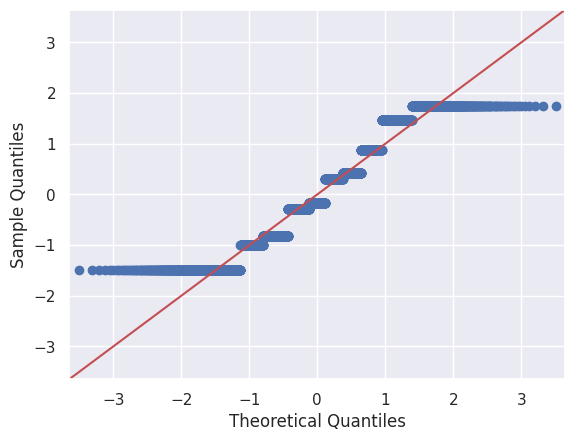

Inflation rate :


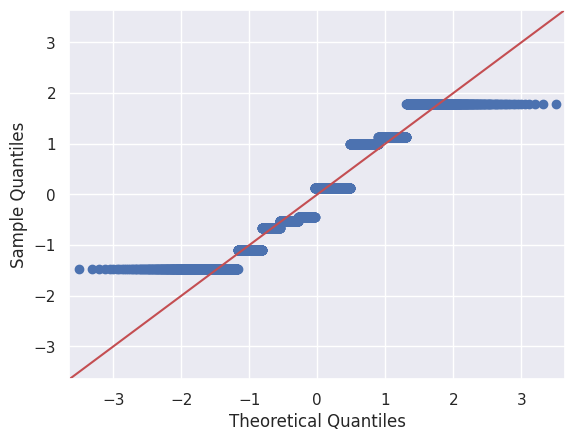

GDP :


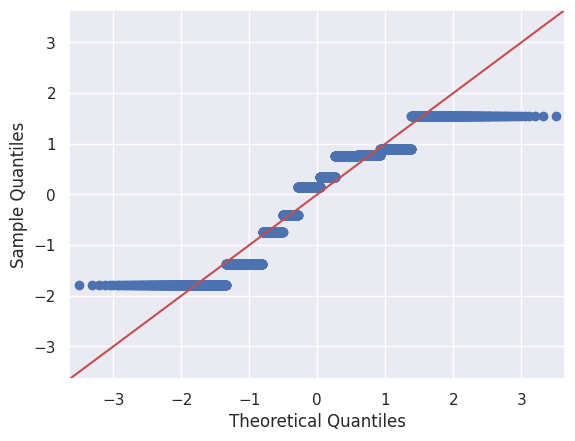

Previous qualification :


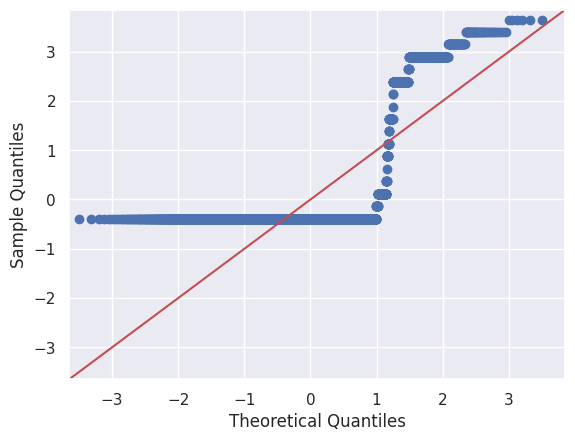

Mother's qualification :


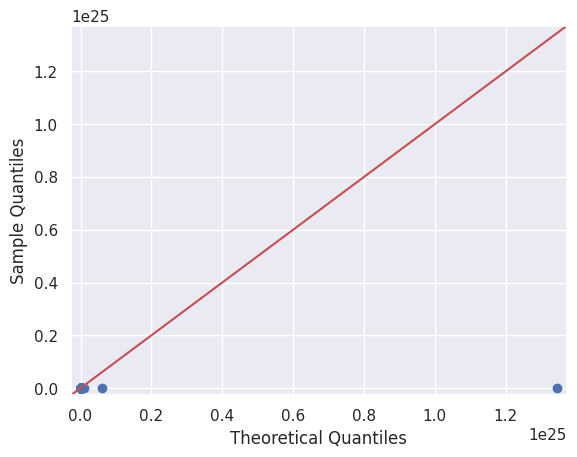

Father's qualification :


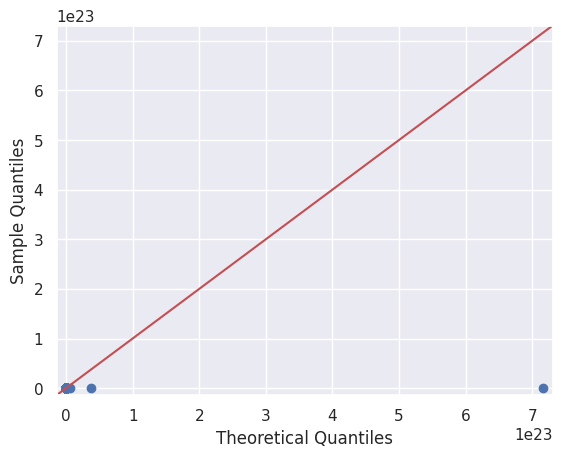

Mother's occupation :


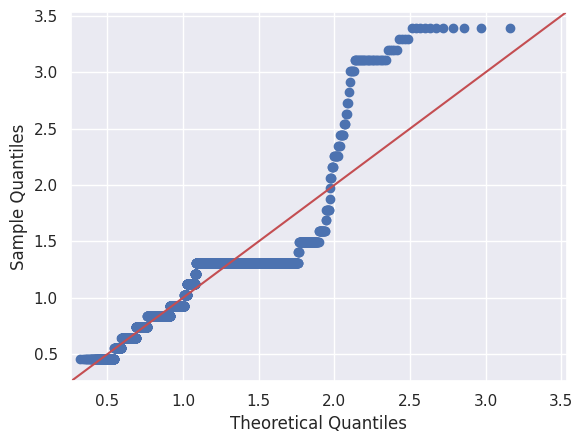

Father's occupation :


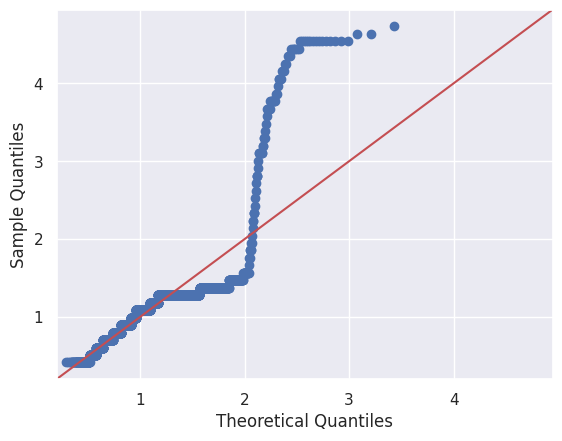

Age at enrollment :


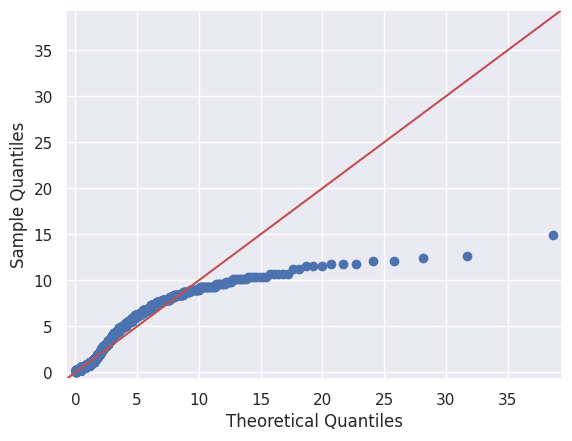

In [ ]:
expdatalist = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Age at enrollment']
datalist = ['Unemployment rate', 'Inflation rate', 'GDP', 'Previous qualification']
for title in datalist:
  print(title,':')
  sm.qqplot(datapd_raw[title],line='45',fit=True,dist=stats.norm)
  plt.show()

for title in expdatalist:
  print(title,':')
  sm.qqplot(datapd_raw[title],line='45',fit=True,dist=stats.lognorm)
  plt.show()



**QQ Plot Analysis:**

In 'Age at enrollment', because of the concave down shape and its proximity to the normal line, it's left skewed. Unemployment rate, Inflation rate, and GDP have approximately normal distributions with spikes in data seen at the tails. Mother and Father's occupations are both right skewed. Both mother and father's qualifications, and previous qualifications appear to have a uniform distribution.

**Correlation data for Drop Outs:**

<ipython-input-47-7154bb9e9974>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(datapd_drop[col_student].corr())


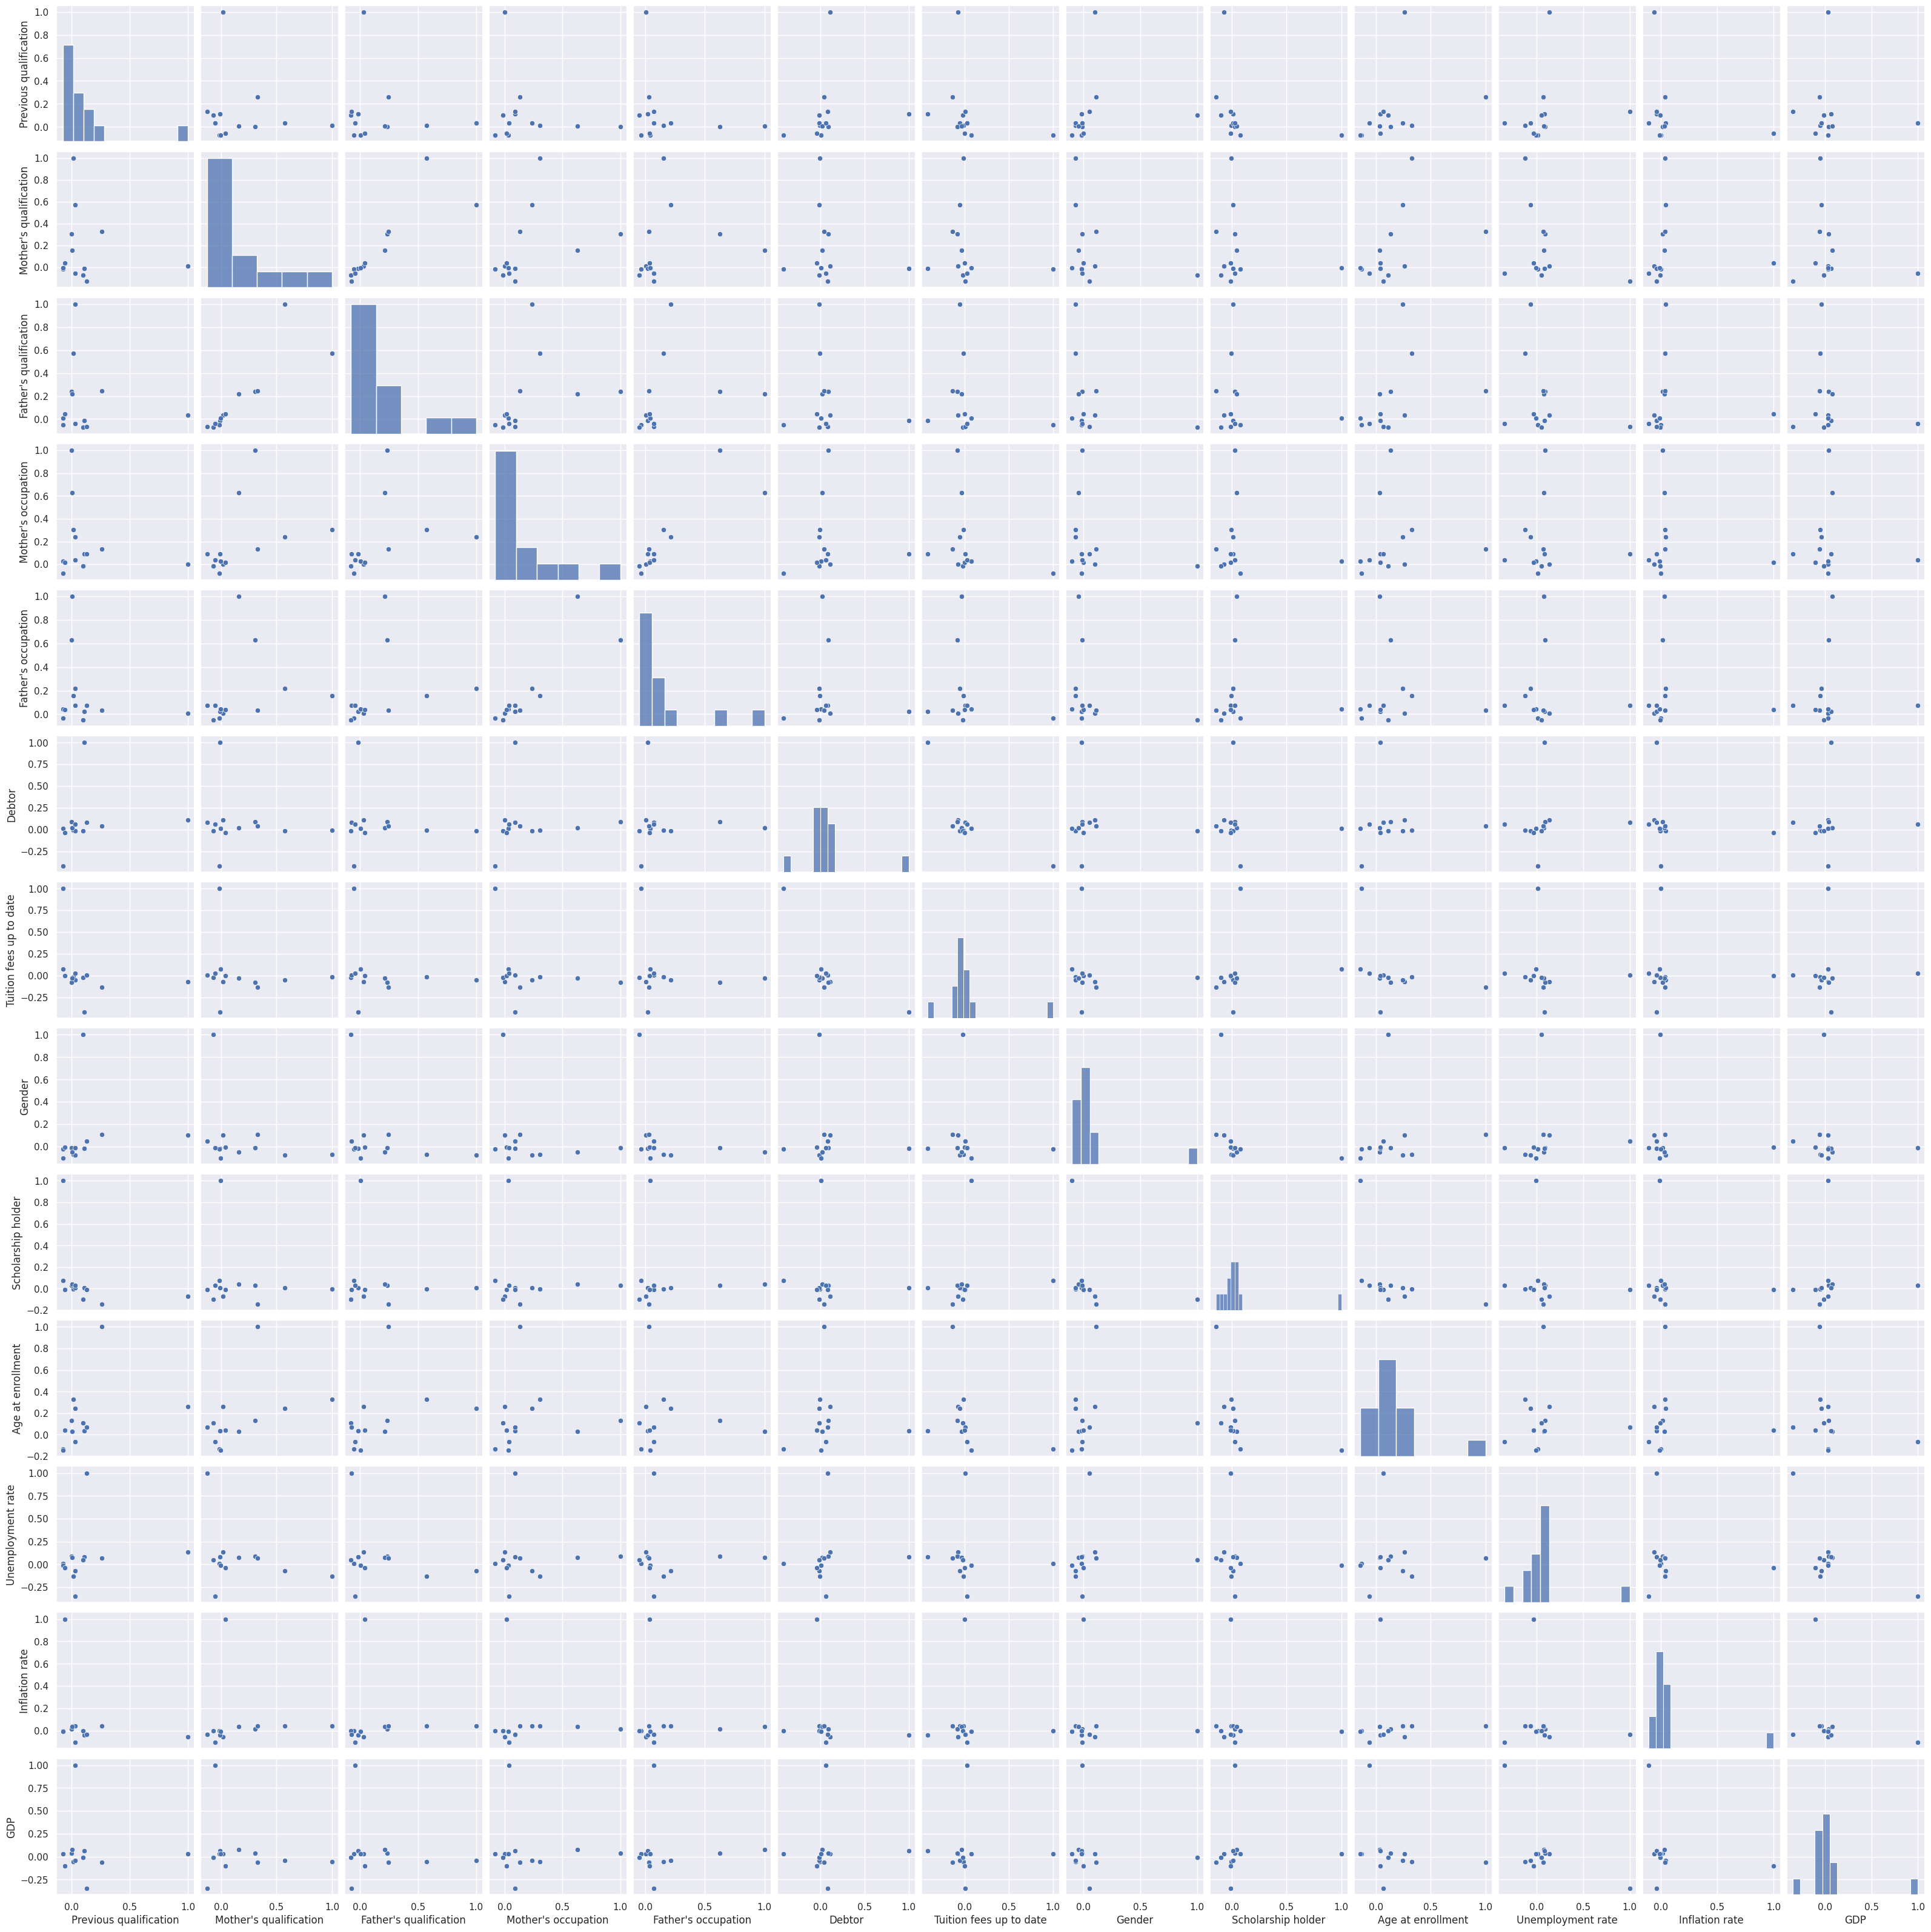

In [ ]:
data = datapd_raw[col_student]

datapd_grad = datapd.where(datapd['Target'] == 'Graduate')
datapd_drop = datapd.where(datapd['Target'] == 'Dropout')
sns.color_palette("Spectral", as_cmap=True)
sns.pairplot(datapd_drop[col_student].corr())

For Drop Outs, there are a number of correlative relationships that show up. There are slightly to moderately positive correlations in the relationships between,

Age at enrollment and the variables: Inflation rate, Unemployment rate, mother and father's occupations, and previous qualifications.


There are positive  relationships between all variables matching between parents, occupations, qualifications. Parents tend to pair up with those who have similar experiences in education and level of career.


**Correlation data for Graduates:**

<ipython-input-48-727dae5bacbf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(datapd_grad[col_student].corr())


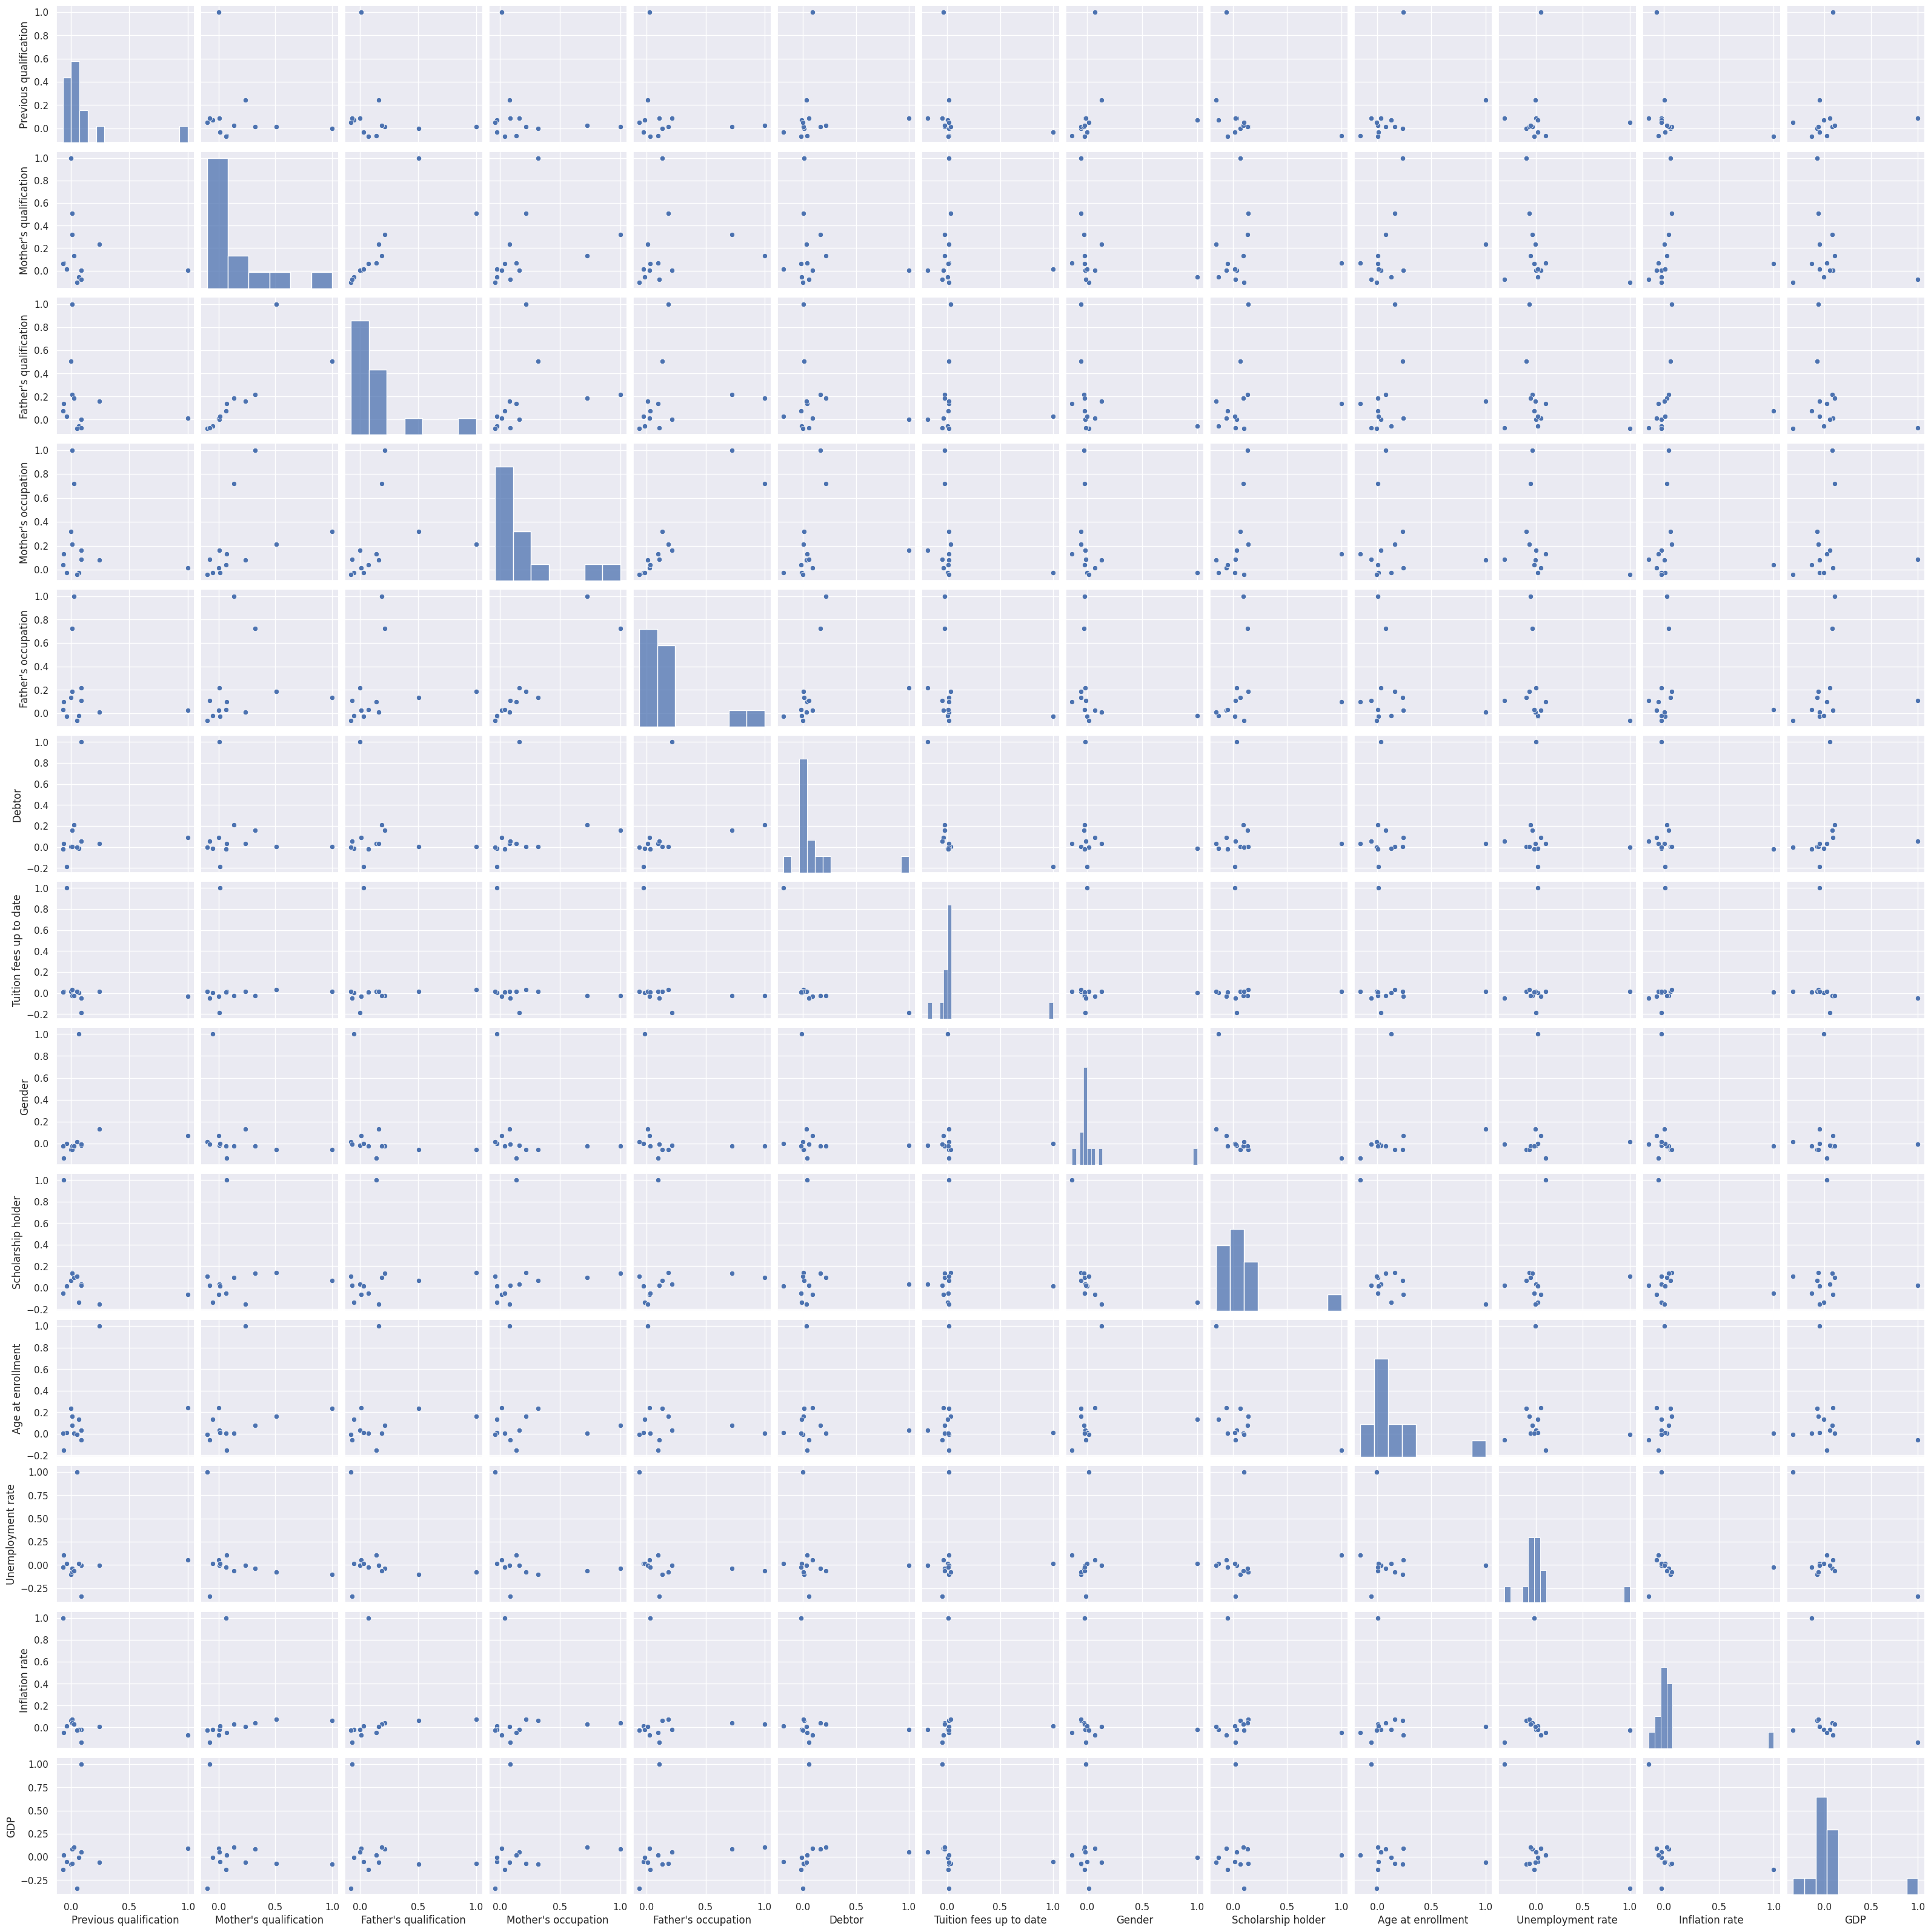

In [ ]:
sns.color_palette("coolwarm", as_cmap=True)
sns.pairplot(datapd_grad[col_student].corr())

Graduates also show a positive correlative relationship between the qualifications and occupations of their parents. The positive relationships that were seen in financial relationships are not as large as the positive slopes seen in the Drop Out group. Inflation rate has a slight positive almost flat relationship with graduates' variables. Showing this group has more financial stability.


**Variables:**

***What are the variables that you are planning to study?***


**Variables analyzed:**

'Previous qualification', 'Mother's qualification', 'Father's qualification', 'Mother's occupation', 'Father's occupation', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target'.

I will break the data's relationship down by age groups, and assess the prominent characteristics of the normal data present in the scenarios I will be investigating.


**Plan:**

To find correlation that will either explain or point towards a path towards  explaining why some individuals drop out of college. After finding strong correlations, I will search through research, sociological and psychological research in hopes of finding explanations for the data.

**Null Hypothesis:**

Of those that graduated:

If they did not receive scholarship funds they had a higher unemployment rate.

Of the individuals who dropped out:

If they are over 30, their GDP will be 75% or less than the GDP of graduates.


**Reference:**

Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2023, March 14). Predict students’ dropout and academic success. Zenodo. https://zenodo.org/records/5777340#.Y7FJotJBwUE


**Citation:** (Data Set)

Predict students’ dropout and academic success. Kaggle. (n.d.). https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data
